In [1]:
import pandas as pd
import numpy as np
import scipy.stats

Running = pd.read_csv('Running.csv')
Running.head()

,Athlete,MileMinDur
0,0,0:06:21
1,0,0:07:00
2,0,0:12:44
3,1,0:06:25
4,1,0:07:24


In [2]:
Running['MileSecDur'] = Running['MileMinDur'].apply(lambda x: int(x.split(':')[1])*60 + int(x.split(':')[-1]))
Running.head()

,Athlete,MileMinDur,MileSecDur
0,0,0:06:21,381
1,0,0:07:00,420
2,0,0:12:44,764
3,1,0:06:25,385
4,1,0:07:24,444


In [3]:
athletes = Running[Running['Athlete'] == 1]['MileSecDur']
non_athletes = Running[Running['Athlete'] == 0]['MileSecDur']

<AxesSubplot: >

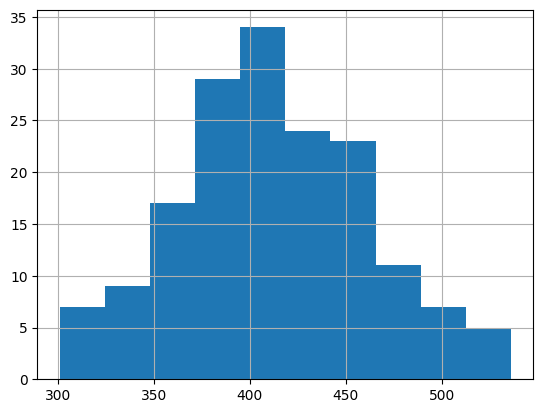

In [4]:
athletes.hist()

<AxesSubplot: >

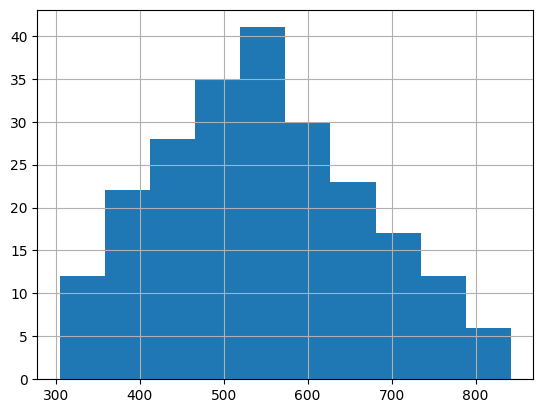

In [5]:
non_athletes.hist()

In [6]:
print(athletes.var())
print(non_athletes.var())

2444.8588535962035
14802.27848574238


In [7]:
n_1 = len(non_athletes)
n_2 = len(athletes)
var_1 = non_athletes.var()
var_2 = athletes.var()
print(n_1, n_2, var_1, var_2)

226 166 14802.27848574238 2444.8588535962035


In [8]:
v_1 = var_1 / n_1
v_2 = var_2 / n_2

In [9]:
dof_welch = (v_1 + v_2)**2 / (v_1**2/(n_1 - 1) + v_2**2/(n_2 - 1))
dof_welch

315.79259489726667

In [10]:
int(dof_welch)

315

Для такого количества степеней свободы и уровня статистической значимости а = 0.05 t критич. = +-1.9667

In [11]:
def hypothesis_check(t, t_critical):
    if abs(t) > t_critical:
        print("Отвергаем Н0. Разница между средними статистически значима.")
    else:
        print("Не удалось отвергнуть Н0.")

t_critical = 1.9667

In [12]:
s_m1_m2 = np.sqrt(v_1 + v_2)
s_m1_m2

8.956833862596019

In [13]:
mean_1 = non_athletes.mean()
mean_2 = athletes.mean()
print(mean_1, mean_2)

546.1017699115044 411.31325301204816


In [14]:
t = (mean_1 - mean_2) / s_m1_m2
t

15.048678915697742

In [15]:
hypothesis_check(t, t_critical)

Отвергаем Н0. Разница между средними статистически значима.


In [18]:
scipy.stats.ttest_ind_from_stats(mean_1, np.sqrt(var_1), n_1,
mean_2, np.sqrt(var_2), n_2,
equal_var=False)

Ttest_indResult(statistic=15.048678915697742, pvalue=5.824578890260259e-39)

In [19]:
scipy.stats.ttest_ind(athletes, non_athletes, equal_var=False)

Ttest_indResult(statistic=-15.048678915697742, pvalue=5.824578890260259e-39)

In [21]:
CI_bottom = (mean_1 - mean_2) - (t_critical*s_m1_m2)
CI_top = (mean_1 - mean_2) + (t_critical*s_m1_m2)
CI_bottom, CI_top

(117.17311174188869, 152.40392205702386)